# PyTorch workflow

In [145]:
import torch
from torch import nn # contains all building block for PyTorch neural network
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

## What is covered:

1. Data (Prepare and loading)
2. Building model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading a model
6. Putting it all together

## 1. Data (preparing adn loading)

Data can be almost everything in machine learning:
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine leanring is 2 major parts:
1. Get data into a numerical representations (tensors)
2. Build model to learn patterns in that numerical representation


Create some *known* data using the linear regression formula 

We'll use a linear regression formula to make a straight line with known **parameters**

In [146]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Adds extra dimension so (50, 1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important cocnepts in machine learning in general)


Generalization: ability of machine learning model to perform well on data it hasn't seen before

* Training 60-80% of data
* Validation 10-20% of data (often but not always needed)
* Testing 10-20% of data

In [147]:
# Create a train/test split
# Can also use scikit learn to include some randomness
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [148]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [149]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plot training data, test data and comapres predictions
    """

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions
    if predictions is not None:
        # Plot the predictions if they exists
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    # Show the legend
    plt.legend(prop={"size": 14});


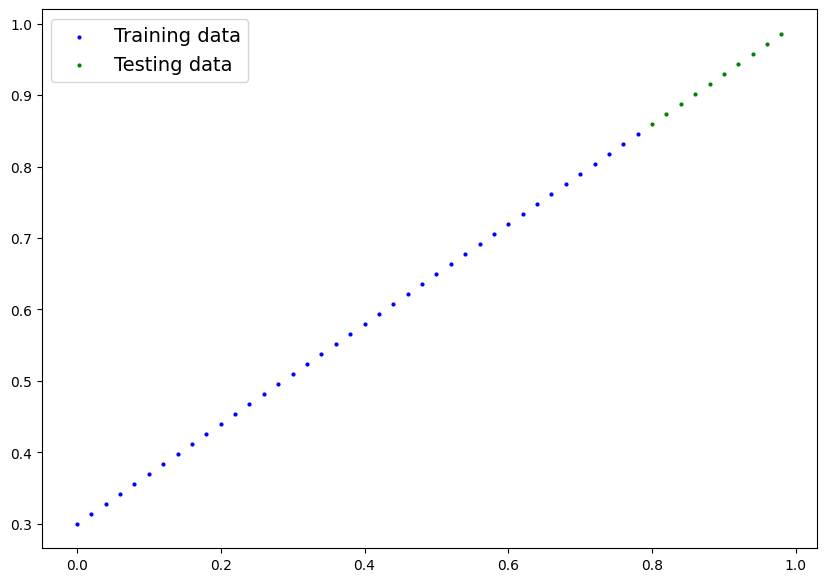

In [150]:
plot_predictions()

## 2. Build model

Getting familiar with object oriented programming using: https://realpython.com/python-classes/#understanding-the-benefits-of-using-classes-in-python 

What our mdoel does?
* Start with random values (weight and bias)
* Look at the training data and adjust the random values to better represent (or get closer) the ideal values (the weight and bias we used to create the data)

How does it do so?

Through 2 main algorithms:
1. Gradient descent
2. Backpropagation

In [151]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        
        # Initialise the model parameters (could also possibly different layers from torch.nn)
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method to define the computation in the model (any subclass of nn.Module needs to overide "forward")
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all the building blocks for computational graphs (a neural networks)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overide forward()
* torch.optim - this is where the optimizers in PyTorch live, and they help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happend in the forward computation

### Checking the contents of our PyTorch model

We can check what is inside our modek using .parameter()

In [152]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is the subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check oyt the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [153]:
# List teh name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [154]:
# The ideal value
weight, bias

(0.7, 0.3)

### Making predictions using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'x_test'

When we pass data through our model, it going to run over the 'forward()' method

In [155]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# The .no_grad do the same but inference mode is preferred
# with torch.no_grad():
    #y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [156]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

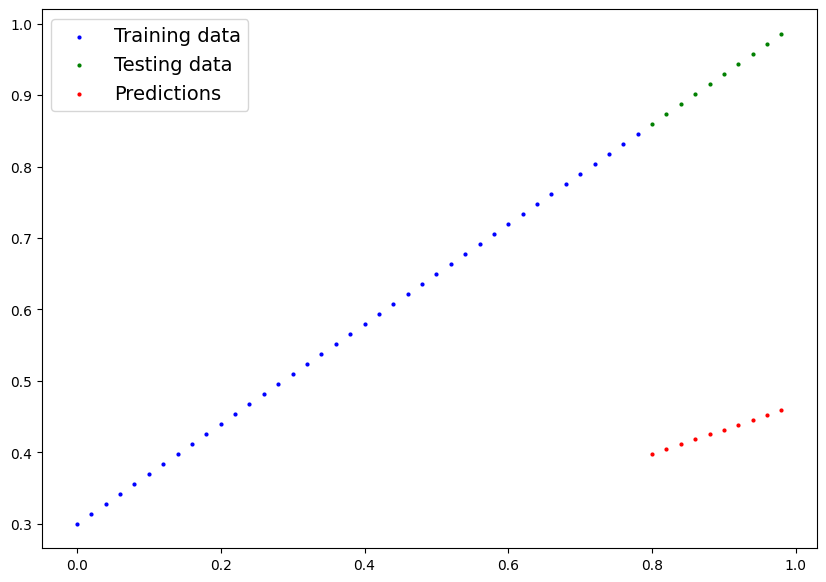

In [157]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some known parameter. From a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong the model's predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion

Things we need to train:

* **Loss function** A function to measure how wrong your model's predictions are to the ideal output, so lower is better.

* **Optimizer** Takes into account the loss of a model and adjustthe model's parameters (eg. weight & bias) to improve the loss function.

Inside the optimizer we'll often set two parameters:
1. params - the model parameters that I'll like to optimize (model_o.parameters())
2. lr (learning rate) - hyperparameters that defines how big/small the optimizer changes the parameters with each step (small result in smaller cahnges)

And sepcifically for PyTorch, we need:
* Training loop
* Testing loop



In [158]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [159]:
# Check out our model's parameters (value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [160]:
# Setup a loss function using Mean absolute error (MAE)
loss_fn = nn.L1Loss()

# Setup an optimizer using SGD (stochastic gradient descent) - One of the most popular
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = leanring rate = hyperparameter that I can set with smaller the value smaller the step each time 


### Building a training loop and testing loop in PyTorch

Things needed in a training loop:

0. Loop through the data and do...
1. Forward pass (this involves datat moving through our model's forward() functions) to make predictions on data - also known as forward propagation
2. Calculate the loss (comapre forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with repsect to loss (**backpropagation**)
6. Optimizer step - use the optimizer to adjust our model to try and improve loss (**gradient descent**)

In [161]:
# An epoch is one loop through the data... (this is a hyperparameter)
epochs = 200

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradient to require gradient

    # 1. Forward pass (or forward propagation)
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train) # predictions first then target next

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step thje optimizer (Perform gradient descent)
    optimizer.step()  # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 to zero them

    ### Testing
    model_0.eval() # turns off gradient tracking and enter the evaluation mode
    with torch.inference_mode():
        # 1. Do forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the etst loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
        # Print out model state.dict()
        print(model_0.state_dict())


Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

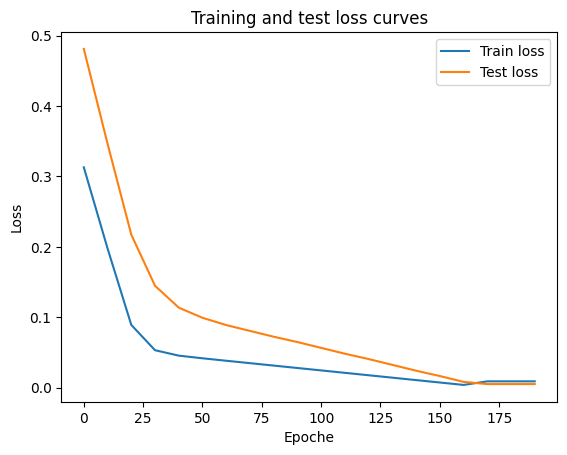

In [162]:
# Plot the loss curvves

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoche")
plt.legend()

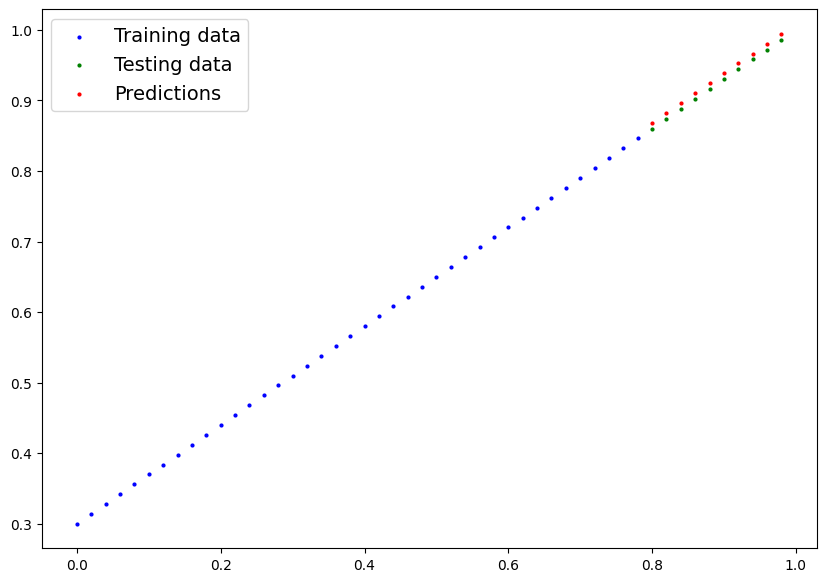

In [163]:
with torch.inference_mode(): # turns off gradient tracking 
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

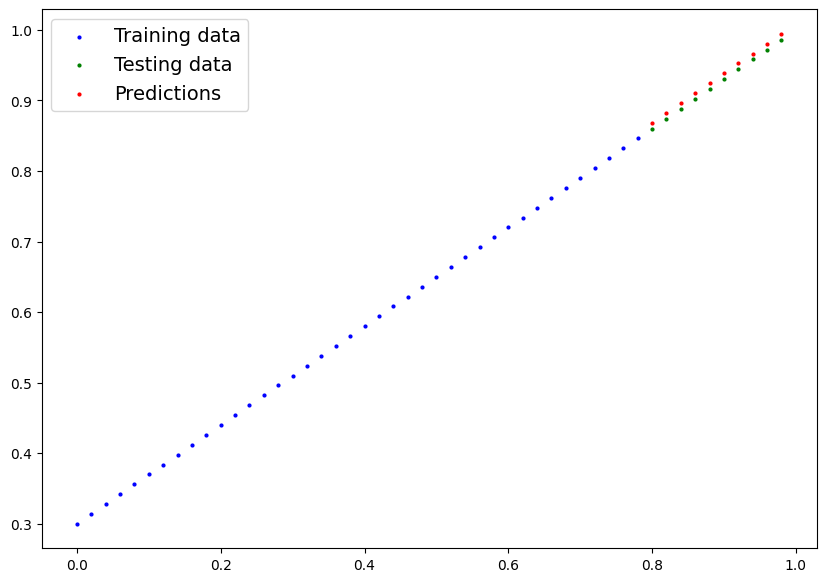

In [164]:
with torch.inference_mode(): # turns off gradient tracking 
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods about saving and loading models in PyTorch.

1. 'torch.save()' - allows you to save a PyTorch object in Python's pickle format
2. 'torch.load()' - allows you to load a saved PyTorch object
3. 'torch.nn.Module.load_sate_dict()' - allows you to load a model's saved state dictionary



In [165]:
# Saving our PyTorch model using 'torch.save()'
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model.pth


## Loading a PyTorch model

Since we saved our model's 'state_dict()' rather than the entire model, we'll create a new instances of our model class and load the saved 'state_dict()' into that.

In [166]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/tmp/ipykernel_647300/1399551089.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [167]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [168]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [169]:
with torch.inference_mode():
    y_preds = model_0(X_test)

loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Go back through the steps and put it all together

In [239]:
# Import Pytorch
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.4.1+cu121'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code is default to using CPU

In [240]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


6.1 data

In [241]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.6
bias = 0.4

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

In [242]:
# Split data 
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

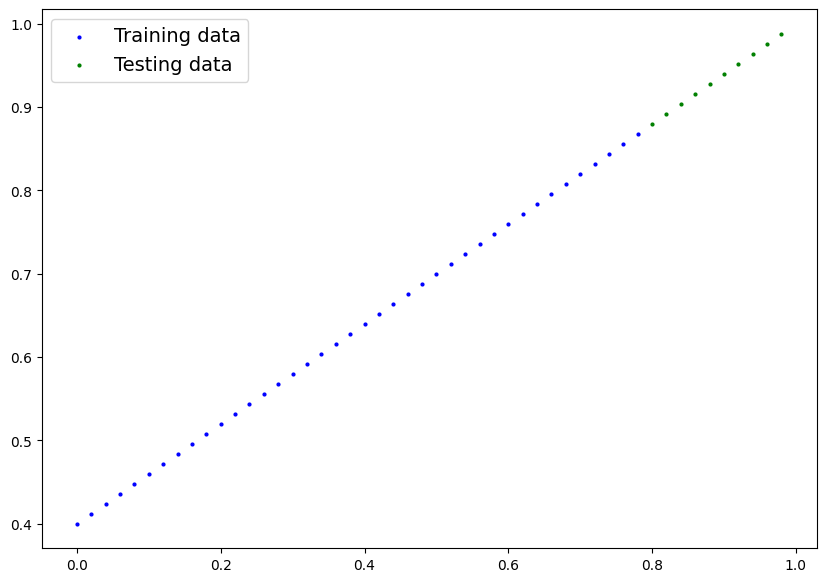

In [243]:
# plot the data
# Note: if you dont't have the plot_preedictions() fucntion loaded, this will error

plot_predictions(X_train, y_train, X_test, y_test)

6.2 Building a PyTorch Linear model

In [244]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, dense layer
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [245]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [246]:
# Setup a loss fucntion
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [247]:
# Lets write a training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero the optimizer
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # Print out what happened
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.494177907705307 | Test loss: 0.5629762411117554
Epoch: 10 | Loss: 0.3789680600166321 | Test loss: 0.42826634645462036
Epoch: 20 | Loss: 0.2637581527233124 | Test loss: 0.2935566008090973
Epoch: 30 | Loss: 0.14854829013347626 | Test loss: 0.15884672105312347
Epoch: 40 | Loss: 0.033338434994220734 | Test loss: 0.02413688227534294
Epoch: 50 | Loss: 0.009796462953090668 | Test loss: 0.003305059624835849
Epoch: 60 | Loss: 0.009796462953090668 | Test loss: 0.003305059624835849
Epoch: 70 | Loss: 0.009796462953090668 | Test loss: 0.003305059624835849
Epoch: 80 | Loss: 0.009796462953090668 | Test loss: 0.003305059624835849
Epoch: 90 | Loss: 0.009796462953090668 | Test loss: 0.003305059624835849
Epoch: 100 | Loss: 0.009796462953090668 | Test loss: 0.003305059624835849
Epoch: 110 | Loss: 0.009796462953090668 | Test loss: 0.003305059624835849
Epoch: 120 | Loss: 0.009796462953090668 | Test loss: 0.003305059624835849
Epoch: 130 | Loss: 0.009796462953090668 | Test loss: 0.003305059

In [253]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
             ('linear_layer.bias', tensor([0.4095]))])

6.4 Making and evaluating predictions

In [252]:
# Turn model into evaluation mode
model_1.eval()

# Making predictions on the test dat
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8901],
        [0.9021],
        [0.9141],
        [0.9261],
        [0.9382],
        [0.9502],
        [0.9622],
        [0.9742],
        [0.9862],
        [0.9982]])

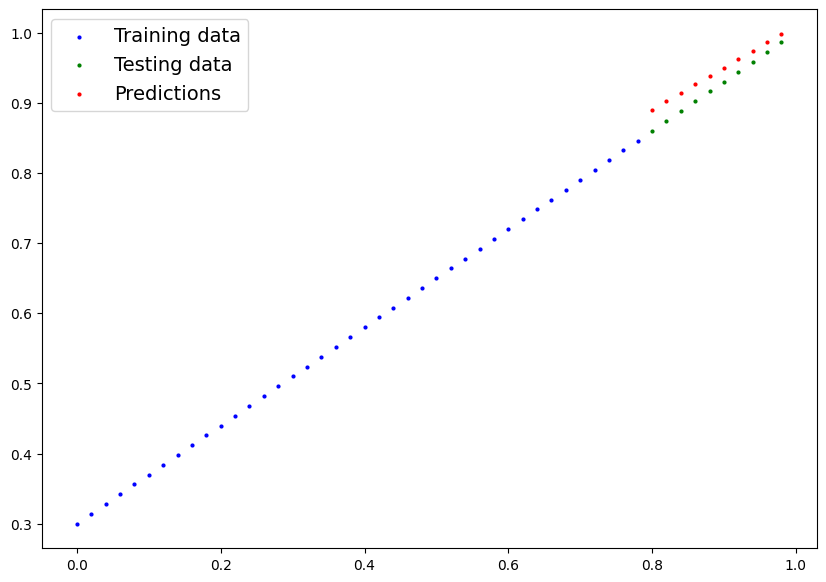

In [251]:
# Cehck out our model predictions vidually
plot_predictions(predictions=y_preds)

6.5 Saving & loading a trained model

In [258]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [259]:
# Load a PyTorch

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the target model to the device
loaded_model_1.to(device)

/tmp/ipykernel_647300/3073054877.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [260]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
             ('linear_layer.bias', tensor([0.4095]))])

In [263]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])